# <font color=##00c296><center>Linear regression</center></font>



Linear regression is one of basic linear approaches that uses least square methods to predict targets by the linear approximation. It uses the well know line equation:

#### __Y = bX + a__
* __X__ is the explanatory variable
* __Y__ is the dependent variable
* __b__ is the slope of the line
* __a__ is the intercept with y axis (when x =0)

the least square method simply tells us, where to draw the line between the datapoints we supplied, so that the sum of their distance to the line would be smallest. All the math is done under the hood, you do not need to calculate it yourself, but you should always at least know what is calculated and how when you create any model. Linear regression is easy to understand, but because of its simplicity, it has its specific places and you should satisfy some basic assumptions:
* variables should be __continuous__
* there needs to be __linear relationship__ - you should see the line shape forming from first glance at the plot
* check for __distribution of residuals__ - in other word, that the datapoints are at least approximately normally distributed along the entire path of the line, so there are not any V / U shapes forming etc
* check out for __outliers__ - if there are some significant or too much of them, if their are not dealed with, they can heavily affect your predictions
* deal with all __NaN__s before you start fitting

Lst comment before we look into code, you can do linear regression with single or multiple variables all the same

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression # import specifically the Linear regression model from sklearn
from sklearn.model_selection import train_test_split # import the train_test_split to help us to easily divide our data

%matplotlib inline

In [2]:
datasets_path_raw = ".jupyter\\datasets\\raw\\"
insur_df = pd.read_csv(datasets_path_raw + "insurance.csv") # quantitative oriented dataset

insur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
insur_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insur_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


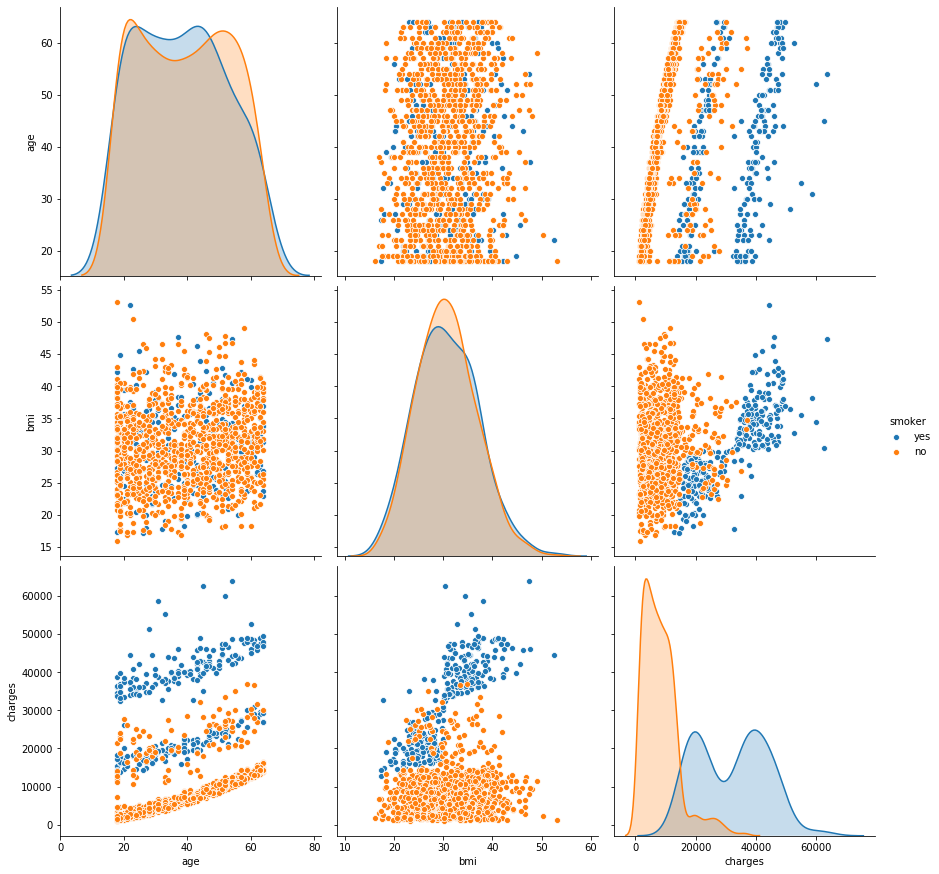

In [5]:
sns.pairplot(data=insur_df, vars=["age", "bmi", "charges"], hue="smoker" ,height=4)

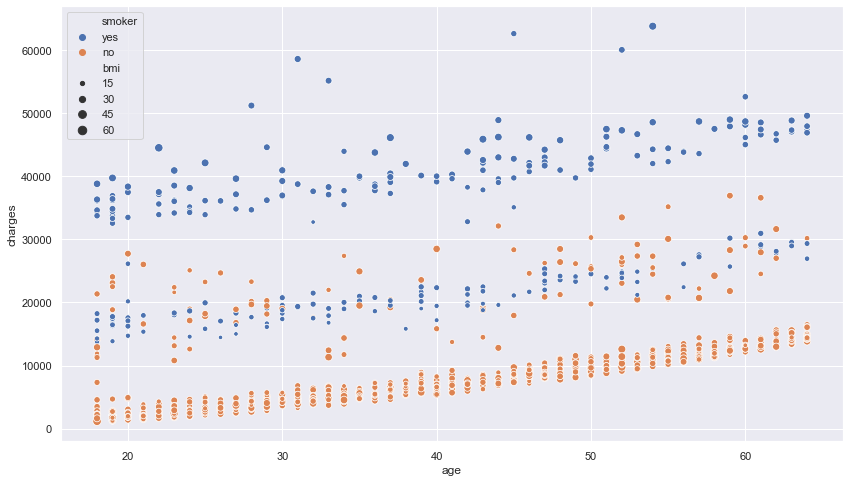

In [6]:
sns.set(rc=({"figure.figsize":(14,8)}))
sns.scatterplot(data=insur_df, x="age", y="charges", hue="smoker", size="bmi")

In [7]:
# changing binary string feature into int/boolean form (1/0)
smoke_bool = {"yes": 1, "no": 0}
insur_df["smoker"] = insur_df["smoker"].map(smoke_bool)

In [8]:
insur_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
X = insur_df[["age", "smoker"]] # separate features for predicting
y= insur_df["charges"] # separating the feature to predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # separate training / testing data

model = LinearRegression() # creating model object
model.fit(X_train, y_train) # fitting / learning model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.score(X_test, y_test) # calculating the score / accuracy of the model

0.7212618566026179

In [11]:
# no lets try to predict fees for smoker and non smoker of the same age

for age in range(20, 61, 20):
    for smoker in range(0,2):
        if smoker==1:
            smoker_str = "yes"
        else:
            smoker_str = "no"
        print("age: " + str(age) + ", smoker: " + smoker_str + ", predicted charges: " + 
              str(int(model.predict([[age, smoker]]))) + " $")


age: 20, smoker: no, predicted charges: 3042 $
age: 20, smoker: yes, predicted charges: 26841 $
age: 40, smoker: no, predicted charges: 8559 $
age: 40, smoker: yes, predicted charges: 32359 $
age: 60, smoker: no, predicted charges: 14077 $
age: 60, smoker: yes, predicted charges: 37876 $


---
Ok, this is pretty simple model how to predict charges based on age and if the client is a smoker. If you want to look how it roughly looks, we can use seaborns lmplot (linear model plot), for quick overview we will insert the whole dataset

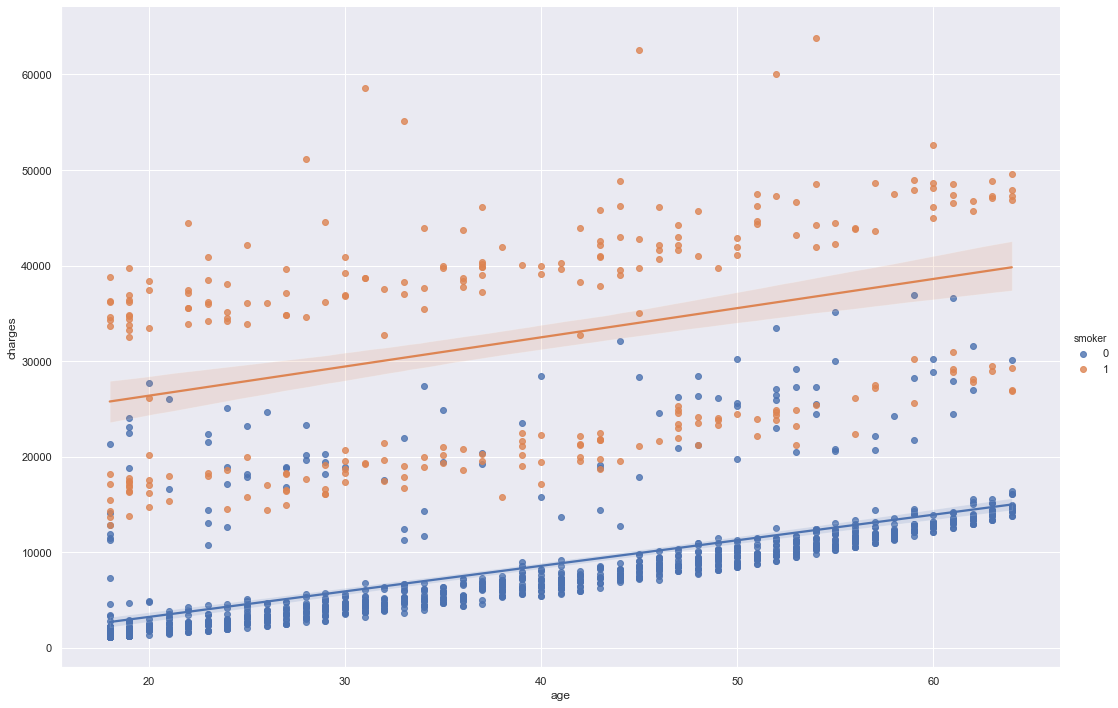

In [12]:
sns.lmplot(x="age", y="charges", data=insur_df, hue="smoker", height=10, aspect=1.5)

In [18]:
print("the coefficient of the model for age is " + str(model.coef_[0]))
print("the coefficient of the model for smoker is " + str(model.coef_[1]))

the coefficient of the model for age is 275.8767100190563
the coefficient of the model for smoker is 23799.166337611798


In [14]:
model.coef_

array([  275.87671002, 23799.16633761])

In [16]:
model.intercept_

-2475.1585309942257

Now, just to make sure the whole concept works as it should, lets take our predicted clients at the age of 60 for both smoker and non smoker and check them, I will be rounding the numbers, so it wont be precise:

equation: __Y = bX + a__<br>
equation for multiple features: __Y = bX + cX + dX + ... + a__<br><br>


<font color=#008c35>our 60 year old non smoker, which we predicted the price at 14 077:</font><br><br>
predicted value = coefficient(age) \* variable(age) + coefficient(smoker) \* variable(smoker) + intercept<br>
y = (275 * 60) + (23799*0) - 2475<br>
y = 16 500 - 2475<br>
__y = 14 025 $__<br>

<font color=#6e0010>our 60 year old smoker, which we predicted the price at 37 876:</font><br><br>
predicted value = coefficient(age) \* variable(age) + coefficient(smoker) \* variable(smoker) + intercept<br>
y = (275*60) + (23799 * 1) - 2475<br>
y = 16 500 + 23 799 - 2475<br>
__y = 37 824 $__<br>

## <font color=##00c296><center>final words</center></font>
As you can see, the concept is very easy to understand and use, but you should be vary where you use it. We could inspect the data further or alter it, because there may be some other factors (in the plot we saw 2 almost precise lines for smoker and non smoker, and then between them there was some overlap, which may tell us there can be some other feature with strong influence and this overlap moved predicted lines closer together). As a fast showcase I consider this notebook done, but I will definitely use some linear regressions in model situations. And nothing is better than download some dataset and try it through and through !